# Comment  intent Prediction

### Objective
**To create a model which able to predict intents of a sentence. There will be four kind of intents will be there seller, buyer, neutral and seller buyer. The data is unlabeled having noise data and different types of sentences are present having links and other description.**

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd. set_option("display.max_columns", 35)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

### Loading the Dataset

In [3]:
df_train=pd.read_csv('out.csv')
df_train

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,Message,FeedText,FeedDescription,FeedTitle,postImgUrl,postImgUrlOriginal,videoTitle,VideoSiteRedirectionUrl,VideoDescription,PostRedirectionImg,websiteUrl,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated,CommentDetails,HashTag
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Youre about to GET LUCKY! Rise and shine. HAP...,Youre about to GET LUCKY! Rise and shine. HAPP...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...","Rest up, tomorrows a BIG DAY.\r\n You&#039;re ...",NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
2,"{""$oid"":""5b1aa7ee8bb55b300895a779""}",5b1aa7ee8bb55b300895a778,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170408029666493""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Start PRESSING with FORWARD moving people!\r\...,Start PRESSING with FORWARD moving people!\r\n...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528412555,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
3,"{""$oid"":""5b1aa7ee8bb55b300895a77b""}",5b1aa7ee8bb55b300895a77a,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169907019716594""}",IMAGE,100000659454027,Gian Fortuin,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Everyone can do it as the work required to ea...,Everyone can do it as the work required to ear...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,NaN,NaN,NaN,NaN,NaN,0,4,0,1528381983,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
4,"{""$oid"":""5b1aa7ee8bb55b300895a77d""}",5b1aa7ee8bb55b300895a77c,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169711059736190""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,You have a habit of waking up every morning t...,You have a habit of waking up every morning to...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528371412,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201881,"{""$oid"":""5d11b7e7a3df6323f881ab7a""}",5d11b7e7a3df6323f881ab79,"{""$numberLong"":""660080627366565""}",Affiliate Marketing - Worldwide,"{""$numberLong"":""3034933096547961""}",TEXT,1518169448,William Ugwu,https://api.socioleads.com/api/Media/getpro?id..

In [4]:
df_train.head()

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,Message,FeedText,FeedDescription,FeedTitle,postImgUrl,postImgUrlOriginal,videoTitle,VideoSiteRedirectionUrl,VideoDescription,PostRedirectionImg,websiteUrl,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated,CommentDetails,HashTag
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Youre about to GET LUCKY! Rise and shine. HAP...,Youre about to GET LUCKY! Rise and shine. HAPP...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...","Rest up, tomorrows a BIG DAY.\r\n You&#039;re ...",NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
2,"{""$oid"":""5b1aa7ee8bb55b300895a779""}",5b1aa7ee8bb55b300895a778,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170408029666493""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Start PRESSING with FORWARD moving people!\r\...,Start PRESSING with FORWARD moving people!\r\n...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528412555,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
3,"{""$oid"":""5b1aa7ee8bb55b300895a77b""}",5b1aa7ee8bb55b300895a77a,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169907019716594""}",IMAGE,100000659454027,Gian Fortuin,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Everyone can do it as the work required to ea...,Everyone can do it as the work required to ear...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,NaN,NaN,NaN,NaN,NaN,0,4,0,1528381983,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
4,"{""$oid"":""5b1aa7ee8bb55b300895a77d""}",5b1aa7ee8bb55b300895a77c,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169711059736190""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,You have a habit of waking up every morning t...,You have a habit of waking up every morning to...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528371412,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN


In this particular dataset we have about 201886 rows and 32 columns

In [5]:
# Checking shape of dataset
df_train.shape

(201886, 32)

In [6]:
# Checking all column names
df_train.columns

Index(['_id', 'Id', 'GroupId', 'GroupName', 'PostId', 'PostType',
       'UserProfileId', 'ProfileName', 'ProfileImage', 'ProfileImageOriginal',
       'Message', 'FeedText', 'FeedDescription', 'FeedTitle', 'postImgUrl',
       'postImgUrlOriginal', 'videoTitle', 'VideoSiteRedirectionUrl',
       'VideoDescription', 'PostRedirectionImg', 'websiteUrl', 'NoOfLike',
       'NoOfComment', 'NoOfShare', 'DateTimeOfPost', 'connectionStatus',
       'postUrl', 'DestinationURL', 'savePostDateTimeUtc',
       'mediaPostUrlUpdated', 'CommentDetails', 'HashTag'],
      dtype='object')

In [7]:
# Checking the info about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201886 entries, 0 to 201885
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   _id                      201886 non-null  object 
 1   Id                       201886 non-null  object 
 2   GroupId                  201886 non-null  object 
 3   GroupName                201856 non-null  object 
 4   PostId                   201886 non-null  object 
 5   PostType                 201886 non-null  object 
 6   UserProfileId            201886 non-null  object 
 7   ProfileName              201702 non-null  object 
 8   ProfileImage             201886 non-null  object 
 9   ProfileImageOriginal     201886 non-null  object 
 10  Message                  201886 non-null  object 
 11  FeedText                 166912 non-null  object 
 12  FeedDescription          84381 non-null   object 
 13  FeedTitle                49558 non-null   object 
 14  post

In [8]:
# Checking null values in the dataset
df_train.isnull().sum()

_id                             0
Id                              0
GroupId                         0
GroupName                      30
PostId                          0
PostType                        0
UserProfileId                   0
ProfileName                   184
ProfileImage                    0
ProfileImageOriginal            0
Message                         0
FeedText                    34974
FeedDescription            117505
FeedTitle                  152328
postImgUrl                  60040
postImgUrlOriginal          60040
videoTitle                 201886
VideoSiteRedirectionUrl    201886
VideoDescription           201886
PostRedirectionImg         201886
websiteUrl                 201886
NoOfLike                        0
NoOfComment                     0
NoOfShare                       0
DateTimeOfPost                  0
connectionStatus                0
postUrl                         0
DestinationURL             166070
savePostDateTimeUtc             0
mediaPostUrlUp

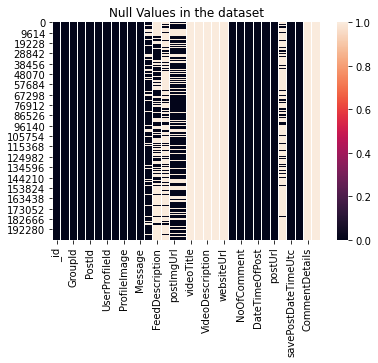

In [9]:
# Visualizing null values in the dataset
sns.heatmap(df_train.isnull())
plt.title("Null Values in the dataset")
plt.show()

In [10]:
print("\nAny duplicated values :",df_train.duplicated().values.any(),"\n")


Any duplicated values : False 



In [11]:
for i in df_train.columns:
        print("Total unique values in {} = {}".format(i,df_train[i].nunique()))

Total unique values in _id = 201886
Total unique values in Id = 201886
Total unique values in GroupId = 1795
Total unique values in GroupName = 1896
Total unique values in PostId = 200471
Total unique values in PostType = 3
Total unique values in UserProfileId = 90255
Total unique values in ProfileName = 87420
Total unique values in ProfileImage = 201886
Total unique values in ProfileImageOriginal = 113840
Total unique values in Message = 167313
Total unique values in FeedText = 144985
Total unique values in FeedDescription = 66361
Total unique values in FeedTitle = 32347
Total unique values in postImgUrl = 140006
Total unique values in postImgUrlOriginal = 131723
Total unique values in videoTitle = 0
Total unique values in VideoSiteRedirectionUrl = 0
Total unique values in VideoDescription = 0
Total unique values in PostRedirectionImg = 0
Total unique values in websiteUrl = 0
Total unique values in NoOfLike = 1229
Total unique values in NoOfComment = 340
Total unique values in NoOfSha

In [12]:
#unique values and their count in multiple object type columns 
for column in df_train[['GroupName','PostType','ProfileName','connectionStatus','mediaPostUrlUpdated']]:
    print(str(column)+':'+str(df_train[column].unique()))
    print(df_train[column].value_counts())
    print('************************************************************************************************************')
    print('\n')

GroupName:['Empower Your Online Success' 'Internet Marketing friends'
 'Massive Marketing Success' ... 'Tollywood Movies'
 'Podcasting Made Simple' 'The Infinity Group']
Affiliate Marketing - Worldwide                 21689
Digital Marketing (SEO-SMO-SEM)                 21014
OUG                                              7821
Best Deals &#064; Hyderabad                      4760
Humans of Digital Marketing &#x2611;&#xfe0f;     3130
                                                ...  
Dogs are family ☑️                                  1
Crazy  for actress Sonam Kapur                      1
 Indian Citizens                                1
Illustrator Love                                    1
Ak Photography                                      1
Name: GroupName, Length: 1896, dtype: int64
************************************************************************************************************


PostType:['IMAGE' 'TEXT' 'VIDEO']
IMAGE    132804
TEXT      59963
VIDEO      9119

In [13]:
df_2=df_train[['GroupName','PostType','ProfileName','Message']]
df_2.shape

(201886, 4)

In [14]:
#converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_2[['GroupName','PostType']]:
    df_2[col]=le.fit_transform(df_2[col])

### Text Preprocessing

In [15]:
stop_words = set(stopwords.words('english'))
for x in range(ord('b'), ord('z')+1):
    stop_words.add(chr(x))

In [16]:
#Preprocessing of Text data
def cleaning_data(row):
    row=row.lower()
    row=re.sub('[^a-zA-Z]',' ',row)
    tokens = word_tokenize(row)
    message = [lemma.lemmatize(word,pos="v") for word in tokens if not word in stop_words]
    cleaned_message=' '.join(message)
    
    return cleaned_message

In [17]:
df_2.Message=df_2.Message.apply(cleaning_data)

In [18]:
df_2= df_2.sample(frac = 1)

In [19]:
#Splitting the data into train and test
df_train = df_2.iloc[:100000,:]
df_test = df_2.iloc[100001:,:]

In [20]:
df_test.to_csv('df_test.csv')

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
Y = vectorizer.fit_transform(df_train['Message'])

In [23]:
import matplotlib.pyplot as plt
vectorizer2 = TfidfVectorizer(stop_words = stop_words, max_features = 1000)
X2 = vectorizer2.fit_transform(df_train['Message'])
words = vectorizer2.get_feature_names()

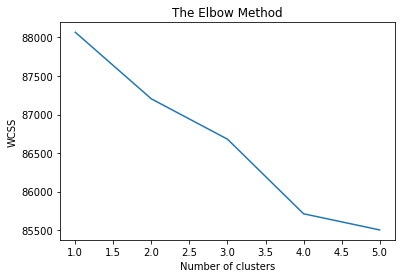

In [24]:
wcss = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [25]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
kmeans=model.fit_predict(Y)
print(kmeans)

[1 1 1 ... 1 2 1]


In [26]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [27]:
cluster_center

array([[1.75598621e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.47199495e-04, 2.18548437e-05, 3.21817644e-06, ...,
        3.37127912e-06, 6.64861928e-06, 5.40469481e-06],
       [4.36267546e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [28]:
labels

array([1, 1, 1, ..., 1, 2, 1])

In [29]:
df_train['Label'] = model.labels_
df_train.head()

,GroupName,PostType,ProfileName,Message,Label
75078,1316,2,Vinayak Deshpande,brut india speak missmalini build million doll...,1
199777,855,0,Amira Cristall,love guy,1
196305,704,0,Meghan Ellis Houck,two favorites sweet potato vine love lavender,1
26715,523,0,Pankaj Kumar Meena,get free demo class digital market course your...,1
152980,972,1,Adebowale Bridget,school fee problem bank list come give members...,1


In [30]:
df_train['Label'].value_counts()

1    87748
0     9744
2     2489
3       19
Name: Label, dtype: int64

In [31]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: earn
 make
 money
 trade
 free
 comment
 info
 pay
 start
 want
 account
 work
 bitcoin
 invest
 investment
 facebook
 online
 daily
 weekly
 home
Cluster 1: com
 https
 share
 www
 market
 new
 facebook
 good
 free
 look
 like
 business
 attachment
 work
 need
 use
 contact
 help
 http
 time
Cluster 2: whatsapp
 available
 order
 ship
 chat
 delivery
 com
 https
 group
 join
 free
 price
 cod
 contact
 number
 send
 cash
 link
 rs
 inbox
Cluster 3: finance
 hyundai
 car
 payments
 showroom
 original
 ac
 single
 remain
 wheel
 neat
 formal
 receipt
 accident
 debit
 spare
 lakdikapul
 exterior
 upto
 child


In [32]:
df_train['ProfileName'] = df_train['ProfileName'].fillna(df_train['ProfileName'].mode()[0])

In [33]:
le=LabelEncoder()
df_train['ProfileName']=le.fit_transform(df_train['ProfileName'])

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vector = TfidfVectorizer(sublinear_tf=True)
tf_vector.fit(df_train['Message'])

TfidfVectorizer(sublinear_tf=True)

In [35]:
x = tf_vector.transform(df_train['Message'].ravel())
y = np.array(df_train['Label'].ravel())

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)

In [37]:
print(x_train.shape, y_test.shape)

(80000, 151030) (20000,)


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

### Smote Analysis

Class=1, n=70225 (25.000%)
Class=0, n=70225 (25.000%)
Class=2, n=70225 (25.000%)
Class=3, n=70225 (25.000%)


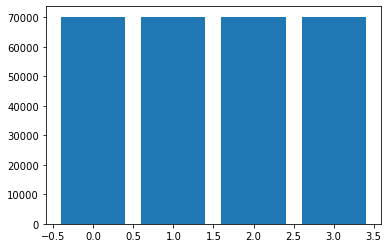

In [40]:
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(x_train,y_train)
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    #plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [41]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy of {} is {}'. format(DTC,round(score*100,2)))
print(confusion_matrix(y_test,y_pred, labels=[0,1]))
print(classification_report(y_test,y_pred))

Accuracy of DecisionTreeClassifier() is 96.01
[[ 1767   197]
 [  453 16975]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1982
           1       0.99      0.97      0.98     17523
           2       0.80      0.93      0.86       490
           3       1.00      0.80      0.89         5

    accuracy                           0.96     20000
   macro avg       0.90      0.90      0.89     20000
weighted avg       0.96      0.96      0.96     20000



In [42]:
from sklearn import model_selection
seed=7
kfold = model_selection.KFold(n_splits=5, random_state=seed,shuffle=True)
results = model_selection.cross_val_score(DTC, x, y, cv=kfold)
print('cross_val_score of',DTC,'is :')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

cross_val_score of DecisionTreeClassifier() is :
Accuracy: 96.834% (0.138%)


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(DTC, param_dist, cv=5)
tree_cv.fit(x,y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}
Best score is 0.91827


In [44]:
DTC=DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 5, min_samples_leaf= 1)
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy of {} is {}'. format(DTC,round(score*100,2)))
print(confusion_matrix(y_test,y_pred, labels=[0,1]))
print(classification_report(y_test,y_pred))

Accuracy of DecisionTreeClassifier(criterion='entropy', max_features=5) is 88.44
[[ 1441   507]
 [ 1179 15953]]
              precision    recall  f1-score   support

           0       0.54      0.73      0.62      1982
           1       0.96      0.91      0.93     17523
           2       0.40      0.59      0.48       490
           3       1.00      1.00      1.00         5

    accuracy                           0.88     20000
   macro avg       0.73      0.81      0.76     20000
weighted avg       0.90      0.88      0.89     20000



In [45]:
#saving model for prediction
import joblib
joblib.dump(DTC,'DTC_model.pkl')

['DTC_model.pkl']

In [47]:
#importing predicted result from text file 
pred3=pd.read_csv('Pred_DTC.csv')

In [48]:
pred3.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [49]:
pred3 = np.array(pred3)

In [50]:
print(pred3.shape,y.shape)

(95423, 1) (100000,)


In [51]:
y=pd.DataFrame(y.reshape(-1,1))

In [53]:
score=accuracy_score(y[:95423],pred3)
print('Accuracy of {} is {}'. format(DTC,round(score*100,2)))

Accuracy of DecisionTreeClassifier(criterion='entropy', max_features=5) is 86.77
